# Interactive data visualizations

Data visualization is an important part of data science. In many cases, it is difficult to find a particular phenomenon only through calculation. Especially when using [EDA method](https://sakurachaojun.github.io/PSYO3505/assignments/EDA.html) to analyze data, without good visualization skills, it is easy to come the wrong conclusion. The best example is [‘fMRI Statistical Maps’](https://sakurachaojun.github.io/PSYO3505/assignments/bioimage.html#working-with-fmri-statistical-maps), every valuable Interpretation is obtained by visualization. From my view, there are two types of data visualization one is ‘static’, like using Matplotlib, [Seaborn](https://sakurachaojun.github.io/PSYO3505/demos/seaborn.html). Once python generates the plot, user cannot change it. And another one is ‘dynamic’, no matter the user or reader they can interact with the graphs. Interact figures help them find more valuable information beyond the figures. 

So far, there are three popular interactive visualization Python packages: [Altair](https://altair-viz.github.io/getting_started/overview.html), [Bokeh](https://docs.bokeh.org/en/latest/index.html), and [Plotly](https://plotly.com/python/getting-started/#JupyterLab-Support-(Python-3.5+)). For the convenience of use, I will mainly introduce Bokeh and Plotly in following parts. 

In [1]:
import numpy as np
import pandas as pd

## Read file and check it

This time I am not using pd.read_csv method instead input file from bokeh package directly. Therefore, you can download my notebook and run it in your own jupyter notebook.

In [16]:
from bokeh.sampledata.iris import flowers

In [17]:
flowers.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [18]:
print(flowers['species'].unique())

['setosa' 'versicolor' 'virginica']


In [19]:
flowers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Visualization with Bokeh

Unlike numpy or pandas, bokeh has kinds of different functions. We cannot import all in one time. Therefore, in next steps, we import package only we need it. 

In [22]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.sampledata.iris import flowers
output_notebook()

Loading BokehJS ...

The above icon indicates we have successfully embedded Bokeh into our notebook. You may note the *output_notebook* parameter, this means to redirect the output (namely, the plot) to our notebook. You can change it to HTML (new browser tab) or any other you want. For redirect to HTML, I recommend you look through the data camp course: [‘Interactive Data Visualization with Bokeh’](https://learn.datacamp.com/courses/interactive-data-visualization-with-bokeh). I have finished this course, very useful for interactive data visualization, highly recommend. 

It should be noted that the data frame cannot pass to bokeh directly, bokeh accepts ‘Column data source’ commonly. (String column names corresponding to the data) 

In [21]:
# Here is Column data source
from bokeh.models import ColumnDataSource

source = ColumnDataSource(data={ 'x':[1, 2, 3, 4, 5], 'y':[8, 6, 5, 2, 3]}) 
source.data

{'x': [1, 2, 3, 4, 5], 'y': [8, 6, 5, 2, 3]}

The other thing is that bokeh output is ‘glyphs’ rather than 'figures', strictly. Glyphs include data, visual shapes (like circles, lines, squares etc.) and properties of this glyph (size, colour, transparency). Let’s forget the above official definition. I will say glyphs is ‘canvas’, you can use any colour pencil to draw. But the important thing is, when we need new 'glyphs', we need new paper, plot = figure (). Otherwise, our work is like graffiti, disorganized. Of course, it's a great way to create graffiti. 

First, we just plot the iris data and see what happens

In [24]:
plot = figure (x_axis_label = 'patal_length', y_axis_label = 'sepal_length')
plot.circle(flowers['petal_length'],flowers['sepal_length'])
show(plot)

You can see that there are some buttons on the side, and try to interact with the 'glyphs' 

This is my graffiti

In [25]:
x = [3,5,0,5]
y = [2,0,2,0]
plot.line(x,y,line_width = 3)
plot.circle(x,y,fill_color = 'yellow',size = 10)
show(plot)

You see, all figures put one ‘glyphs’ because I am not clean the ‘paper’. plot = figure()  

We need to reload the plot for the following steps 

In [26]:
plot = figure (x_axis_label = 'patal_length', y_axis_label = 'sepal_length')
plot.circle(flowers['petal_length'],flowers['sepal_length'])

GlyphRenderer(id='1229', ...)

Without show() the 'glyphs' will not display, because 'plot' is a speical object

In [27]:
type(plot)

bokeh.plotting.figure.Figure

Now, we can map the different species to a different colour, to do this we need to import *CategoricalColorMapper* and create a mapper

In [35]:
plot = figure()

In [36]:
# import package 
from bokeh.models import CategoricalColorMapper

#create a mapper
mapper = CategoricalColorMapper(
         factors = [ item for item in flowers['species'].unique() ],
         palette = ['red','green','blue'])

#using dict to plot 
plot.circle('petal_length', 'sepal_length', source=flowers, color={'field': 'species', 'transform': mapper},legend_group = 'species')
plot.legend.location = 'top_left'

show(plot)

Also, We can add hover to 'glyphs' and let us look at each point values specifically. Import *HoverTool* and create hover 

In [37]:
from bokeh.models import HoverTool

#'@'means get the speific value from data set
hover = HoverTool(tooltips=[('species name', '@species'), ('petal length', '@petal_length'), ('sepal length', '@sepal_length') ])

#Here we not need to new glyphs, we just add new button 
plot.add_tools(hover)

show(plot)

Try to hover the cursor over the points

Like matplotlib, Bokeh accepts ‘subplot’ to generates multiple ‘glyphs’ in one output. Here we use gridplot package 

In [41]:
from bokeh.layouts import gridplot

#generate plot1 
plot1 = figure (x_axis_label = 'patal_length', y_axis_label = 'sepal_length')
plot1.circle('petal_length', 'sepal_length', source=flowers, color={'field': 'species', 'transform': mapper})
hover = HoverTool(tooltips=[('species name', '@species'), ('petal length', '@petal_length'), ('sepal length', '@sepal_length') ])
plot1.add_tools(hover)

#generate plot2 
plot2 = figure (x_axis_label = 'patal_length', y_axis_label = 'sepal_width')
plot2.circle('petal_length', 'sepal_width', source=flowers, color={'field': 'species', 'transform': mapper},legend_group = 'species')
plot2.add_tools(hover)

#put together, none means we using column not row 
layout = gridplot([[plot1,None],[plot2,None]])

In [42]:
show(layout)

### Interactive apps with Bokeh 

We can even use Bokeh to make a small app, following codes from Github. Unfortunately, 'jupyter book'(Note not 'jupyter notebook') not support callback function, so this app cannot be running here, you can download the file and run it on your machine.

In [13]:
from bokeh.layouts import column
from bokeh.models import Slider

#import data 
from bokeh.sampledata.sea_surface_temperature import sea_surface_temperature

#From https://github.com/bokeh/bokeh/blob/2.2.3/examples/howto/server_embed/notebook_embed.ipynb

Callback function is very important here because when the user adjusts the slider, the 'glyphs' must update. call back monitors the change and pass the peremeter to the main function. 

In [45]:
#main function 
def bkapp(doc):
    df = sea_surface_temperature.copy()
    source = ColumnDataSource(data=df)

    plot = figure(x_axis_type='datetime', y_range=(0, 25),
                  y_axis_label='Temperature (Celsius)',
                  title="Sea Surface Temperature at 43.18, -70.43")
    
    plot.line('time', 'temperature', source=source)

#callback function
    def callback(attr, old, new):
        if new == 0:
            data = df
        else:
            data = df.rolling('{0}D'.format(new)).mean() 
        source.data = ColumnDataSource.from_df(data) #return new values 

#create a slider allowed user change    
    slider = Slider(start=0, end=30, value=0, step=1, title="Smoothing by N Days")
#link slider to callback function
    slider.on_change('value', callback)

#put together 
    doc.add_root(column(slider, plot))
    
show(bkapp)    

## Visualization with Plotly

In [15]:
import plotly.io as pio
import plotly.express as px
import plotly.offline as py

figure = px.scatter(flowers, x="sepal_width", y="sepal_length", color="species", size="sepal_length")
figure

In [14]:
import plotly.figure_factory as ff
import pandas as pd

table = ff.create_table(flowers[:5])

In [15]:
table

### Interactive apps with Plotly

In [52]:
import matplotlib.pyplot as plt
vol = io.imread("https://s3.amazonaws.com/assets.datacamp.com/blog_assets/attention-mri.tif")

In [53]:
vol.shape

(157, 189, 68)

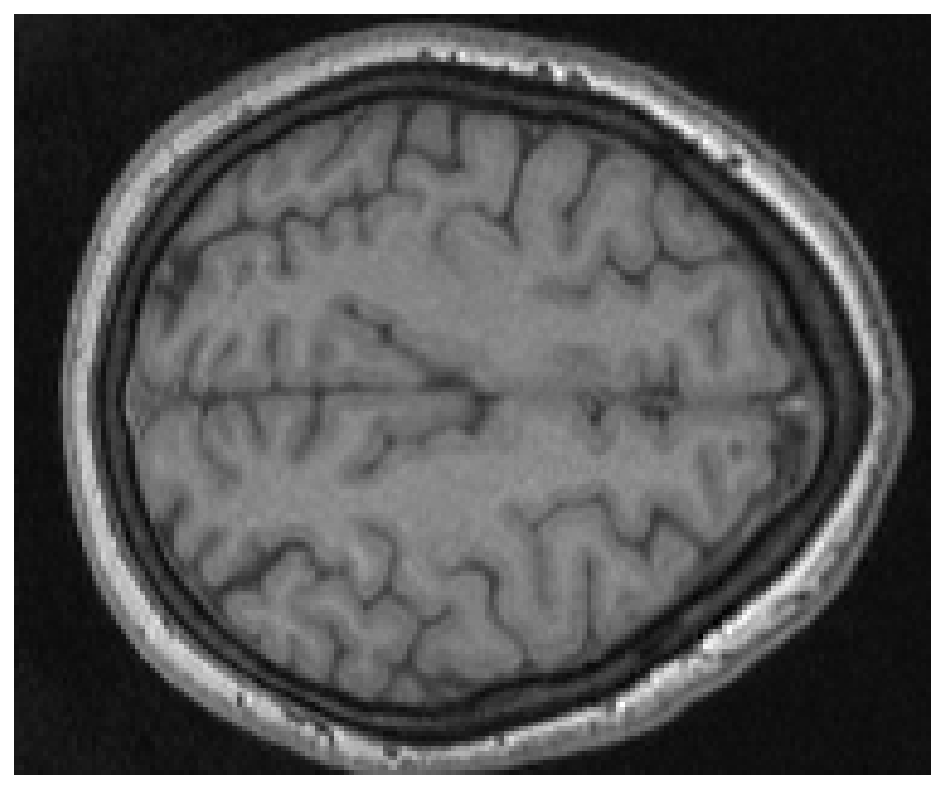

In [67]:
plt.imshow(vol[:,:,50],cmap = 'gray') 
plt.axis('off')
plt.show()

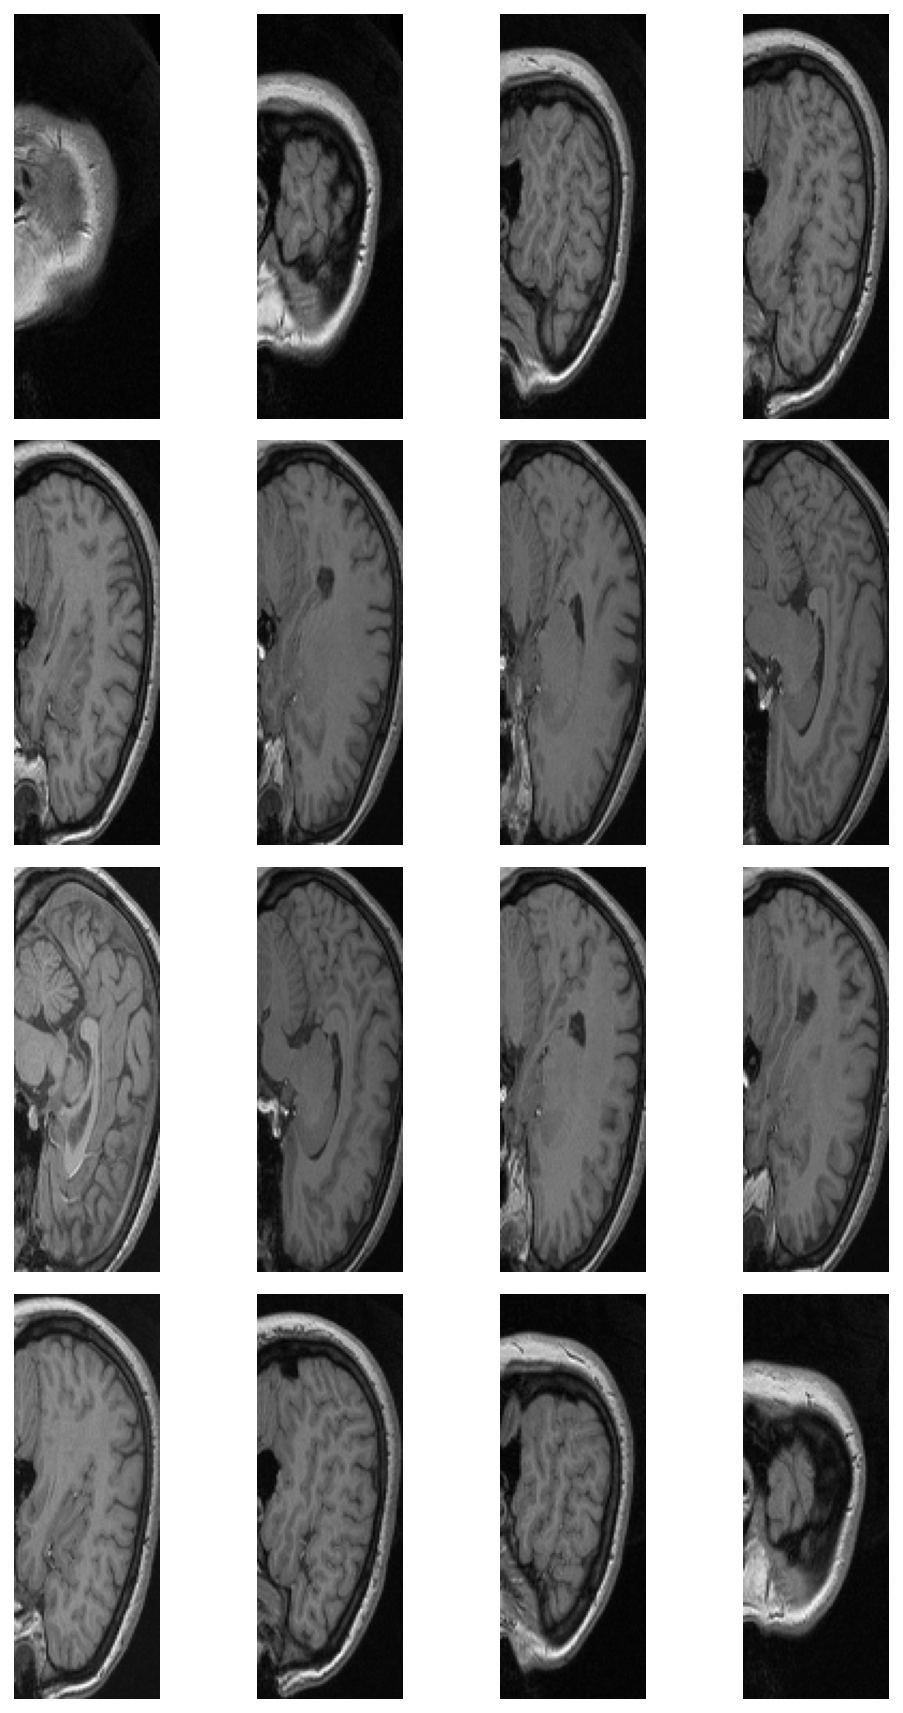

In [70]:
fig = plt.figure(figsize=[8, 12])
subplot_counter = 1

for i in range (0,157,10):
    ax = fig.add_subplot(4, 4, subplot_counter)
    plt.imshow(vol[i,:,:],cmap = 'gray') 
    plt.axis('off')
    
    plt.tight_layout()
    subplot_counter += 1
    
plt.show()

In [0]:
# From: https://plotly.com/python/visualizing-mri-volume-slices/
import time
import numpy as np

from skimage import io

volume = vol.T
r, c = volume[0].shape

# Define frames
import plotly.graph_objects as go
nb_frames = 68

fig = go.Figure(frames=[go.Frame(data=go.Surface(
    z=(6.7 - k * 0.1) * np.ones((r, c)),
    surfacecolor=np.flipud(volume[67 - k]),
    cmin=0, cmax=200
    ),
    name=str(k) # you need to name the frame for the animation to behave properly
    )
    for k in range(nb_frames)])

# Add data to be displayed before animation starts
fig.add_trace(go.Surface(
    z=6.7 * np.ones((r, c)),
    surfacecolor=np.flipud(volume[67]),
    colorscale='Gray',
    cmin=0, cmax=200,
    colorbar=dict(thickness=20, ticklen=4)
    ))

def frame_args(duration):
    return {
            "frame": {"duration": duration},
            "mode": "immediate",
            "fromcurrent": True,
            "transition": {"duration": duration, "easing": "linear"},
        }

sliders = [
            {
                "pad": {"b": 10, "t": 60},
                "len": 0.9,
                "x": 0.1,
                "y": 0,
                "steps": [
                    {
                        "args": [[f.name], frame_args(0)],
                        "label": str(k),
                        "method": "animate",
                    }
                    for k, f in enumerate(fig.frames)
                ],
            }
        ]

# Layout
fig.update_layout(
         title='Slices in volumetric data',
         width=600,
         height=600,
         scene=dict(
                    zaxis=dict(range=[-0.1, 6.8], autorange=False),
                    aspectratio=dict(x=1, y=1, z=1),
                    ),
         updatemenus = [
            {
                "buttons": [
                    {
                        "args": [None, frame_args(50)],
                        "label": "&#9654;", # play symbol
                        "method": "animate",
                    },
                    {
                        "args": [[None], frame_args(0)],
                        "label": "&#9724;", # pause symbol
                        "method": "animate",
                    },
                ],
                "direction": "left",
                "pad": {"r": 10, "t": 70},
                "type": "buttons",
                "x": 0.1,
                "y": 0,
            }
         ],
         sliders=sliders
)

#fig.show()

## References